In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"

In [2]:
df = pd.read_csv(r"C:\Users\Jonat\dat-11-15\Homework\Unit2\data\housing.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
tree = DecisionTreeRegressor(max_depth = 3)

In [5]:
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

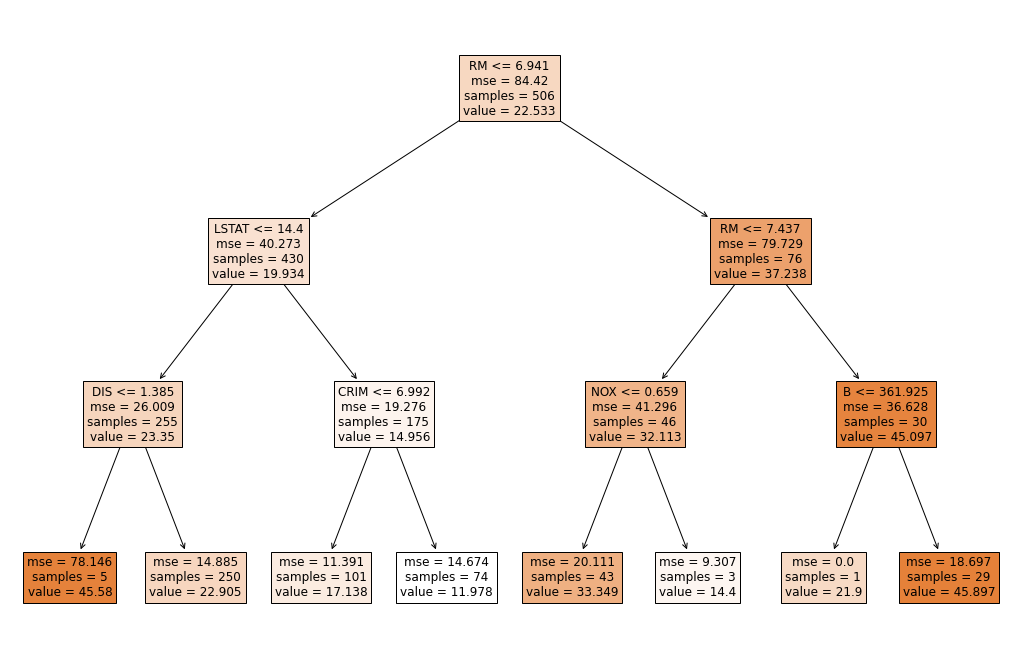

In [8]:
plt.figure(figsize = (18, 12))

plot_tree(tree, fontsize = 12, filled = True, feature_names = X.columns);

In [15]:
root_error = np.mean((df['PRICE'] - df['PRICE'].mean())**2)

left = df[df['RM'] <= 6.941]
right = df[df['RM'] > 6.941]

left_error = np.mean((left['PRICE'] - left['PRICE'].mean()) ** 2)
right_error = np.mean((right['PRICE'] - right['PRICE'].mean())**2)

left_w = left.shape[0] / df.shape[0]
right_w = right.shape[0] / df.shape[0]

info_gain = root_error - left_w * left_error - right_w * right_error

In [16]:
info_gain

38.220464479057114

In [11]:
root_error

84.4195561561656

In [13]:
left_w

1.0

In [17]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
sample = np.array([[.1, 24, 15, 30, 1, 0.7, 7, 4, 2, 300, 21, 400, 24]])

In [25]:
sample

array([[1.0e-01, 2.4e+01, 1.5e+01, 3.0e+01, 1.0e+00, 7.0e-01, 7.0e+00,
        4.0e+00, 2.0e+00, 3.0e+02, 2.1e+01, 4.0e+02, 2.4e+01]])

In [26]:
tree.predict(sample)

array([17.13762376])

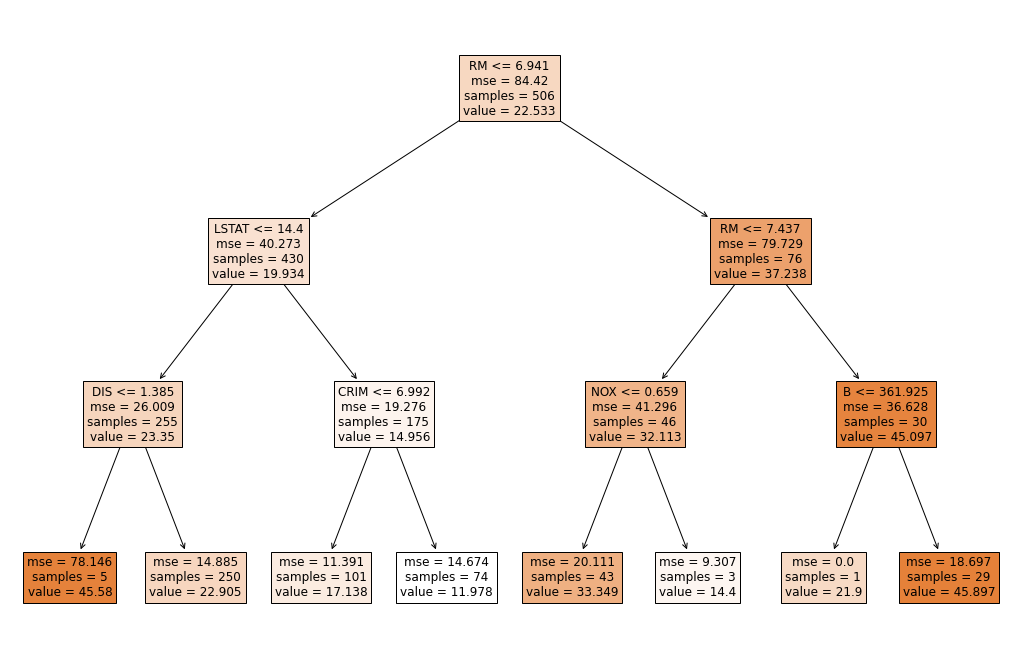

In [27]:
plt.figure(figsize = (18, 12))

plot_tree(tree, fontsize = 12, filled = True, feature_names = X.columns);

In [28]:
tree.predict(sample)

array([17.13762376])

In [29]:
tree.predict(X)

array([22.9052    , 22.9052    , 33.34883721, 33.34883721, 33.34883721,
       22.9052    , 22.9052    , 17.13762376, 17.13762376, 17.13762376,
       17.13762376, 22.9052    , 17.13762376, 22.9052    , 22.9052    ,
       22.9052    , 22.9052    , 17.13762376, 22.9052    , 22.9052    ,
       17.13762376, 22.9052    , 17.13762376, 17.13762376, 17.13762376,
       17.13762376, 17.13762376, 17.13762376, 22.9052    , 22.9052    ,
       17.13762376, 22.9052    , 17.13762376, 17.13762376, 17.13762376,
       22.9052    , 22.9052    , 22.9052    , 22.9052    , 22.9052    ,
       33.34883721, 22.9052    , 22.9052    , 22.9052    , 22.9052    ,
       22.9052    , 22.9052    , 17.13762376, 17.13762376, 17.13762376,
       22.9052    , 22.9052    , 22.9052    , 22.9052    , 17.13762376,
       33.34883721, 22.9052    , 22.9052    , 22.9052    , 22.9052    ,
       22.9052    , 17.13762376, 22.9052    , 22.9052    , 33.34883721,
       22.9052    , 22.9052    , 22.9052    , 22.9052    , 22.90

In [30]:
tree.score(X, y)

0.8177924678036443

In [42]:
1 - (np.mean((tree.predict(X) - y)**2) / np.mean((y - y.mean())**2))

0.8177924678036443

In [40]:
np.mean((tree.predict(X) - y)**2)

15.381878996326593

In [43]:
tree.feature_importances_

array([0.03254249, 0.        , 0.        , 0.        , 0.0288244 ,
       0.64124098, 0.        , 0.0721473 , 0.        , 0.        ,
       0.        , 0.01593447, 0.20931036])

In [45]:
feats = pd.DataFrame({
    'Column': X.columns,
    'Importance': tree.feature_importances_
})

In [47]:
feats.sort_values(by = 'Importance', ascending = False)

,Column,Importance
5,RM,0.641241
12,LSTAT,0.209310
7,DIS,0.072147
0,CRIM,0.032542
4,NOX,0.028824
11,B,0.015934
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
6,AGE,0.000000


In [64]:
df = pd.read_csv(r"C:\Users\Jonat\dat-11-15\ClassMaterial\Unit1\data\master.csv", parse_dates = ['visit_date'])

In [50]:
df.head()

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN


In [51]:
df.isnull().sum()

id                       0
visit_date               0
visitors                 0
day_of_week              0
holiday                  0
genre                    0
area                     0
latitude                 0
longitude                0
reserve_visitors    143714
dtype: int64

In [53]:
df['reserve_visitors'].value_counts().sort_index()

1.0      1975
2.0     13587
3.0      5376
4.0      8042
5.0      3581
6.0      4627
7.0      6713
8.0      5639
9.0      3738
10.0     6703
11.0     2439
12.0     3677
13.0      744
14.0     1318
15.0     2259
16.0      704
17.0     1459
18.0     1047
20.0      722
21.0     2591
22.0      696
23.0     3564
24.0      613
25.0     3476
27.0      736
28.0      706
30.0     1297
31.0      738
32.0     1182
33.0      771
35.0     1358
36.0     2033
37.0      774
40.0      731
41.0      772
42.0      608
43.0     1372
44.0     1246
46.0     1393
47.0      771
48.0      603
51.0      659
54.0      767
58.0      574
59.0      672
60.0     1411
76.0      767
83.0      575
96.0      588
Name: reserve_visitors, dtype: int64

In [55]:
df['reserve_visitors_na'] = df['reserve_visitors'].isnull()

In [57]:
df['reserve_visitors'] = df['reserve_visitors'].fillna(0)

In [60]:
df.head()

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors,reserve_visitors_na
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,True
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,True
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,True
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,True
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,True


In [63]:
transformed = df.groupby(['day_of_week', 'area'])['reserve_visitors'].transform('mean')

In [ ]:
df['reserve_visitors'] = df['reserve_visitors'].fillna(transformed.astype(int))

In [67]:
query = df['reserve_visitors'].isnull()

In [68]:
train  = df.loc[~query, :]
test   = df.loc[query, :]

In [69]:
train.head()

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
11,air_ba937bf13d40fb24,2016-01-26,11,Tuesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2.0
21,air_ba937bf13d40fb24,2016-02-09,15,Tuesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,7.0
24,air_ba937bf13d40fb24,2016-02-12,26,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,18.0
25,air_ba937bf13d40fb24,2016-02-13,8,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2.0
37,air_ba937bf13d40fb24,2016-02-27,23,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2.0


In [70]:
test

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
...,...,...,...,...,...,...,...,...,...,...
252087,air_a17f0778617c76e2,2017-04-04,10,Tuesday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN
252092,air_a17f0778617c76e2,2017-04-10,28,Monday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN
252099,air_a17f0778617c76e2,2017-04-17,19,Monday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN
252100,air_a17f0778617c76e2,2017-04-18,11,Tuesday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN


In [72]:
X = train.select_dtypes(include = np.number).drop('reserve_visitors', axis = 1)
y = train['reserve_visitors']

tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [75]:
df['reserve_visitors'] = df['reserve_visitors'].fillna(tree.predict(test.select_dtypes(include = np.number).drop('reserve_visitors', axis = 1)))

array([16.19320618, 16.19320618, 16.19320618, ..., 16.16075417,
       16.16075417, 17.24977272])

In [78]:
imputed_vals = pd.Series(tree.predict(test.select_dtypes(include = np.number).drop('reserve_visitors', axis = 1)))

In [79]:
df['reserve_visitors'] = df['reserve_visitors'].fillna(imputed_vals)

In [83]:
df['reserve_visitors'].rolling(5).mean()

0               NaN
1               NaN
2               NaN
3               NaN
4         16.180225
            ...    
252103          NaN
252104          NaN
252105          NaN
252106    16.400000
252107    22.600000
Name: reserve_visitors, Length: 252108, dtype: float64

In [97]:
import category_encoders as ce

In [91]:
ore = ce.OrdinalEncoder(mapping = [
    {
        'col': 'day_of_week',
        'mapping': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    }
])

In [89]:
?ce.OrdinalEncoder

In [92]:
ore.fit_transform(df)

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,3,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
1,air_ba937bf13d40fb24,2016-01-14,32,4,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
2,air_ba937bf13d40fb24,2016-01-15,29,5,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
3,air_ba937bf13d40fb24,2016-01-16,22,6,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.160754
4,air_ba937bf13d40fb24,2016-01-18,6,1,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.160754
...,...,...,...,...,...,...,...,...,...,...
252103,air_a17f0778617c76e2,2017-04-21,49,5,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.000000
252104,air_a17f0778617c76e2,2017-04-22,60,6,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.000000
252105,air_a17f0778617c76e2,2017-03-26,69,7,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.000000
252106,air_a17f0778617c76e2,2017-03-20,31,1,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.000000


In [87]:
dir(ore)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_dim',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'category_mapping',
 'cols',
 'drop_cols',
 'drop_invariant',
 'feature_names',
 'fit',
 'fit_transform',
 'get_feature_names',
 'get_params',
 'handle_missing',
 'handle_unknown',
 'inverse_transform',
 'mapping',
 'ordinal_encoding',
 'return_df',
 'set_params',
 'transform',
 'verbose']

In [88]:
ore.mapping

[{'col': 'id',
  'mapping': air_ba937bf13d40fb24      1
  air_25e9888d30b386df      2
  air_fd6aac1043520e83      3
  air_64d4491ad8cdb1c6      4
  air_ee3a01f0c71a769f      5
                         ... 
  air_cf5ab75a0afb8af9    826
  air_1c0b150f9e696a5f    827
  air_900d755ebd2f7bbd    828
  air_a17f0778617c76e2    829
  NaN                      -2
  Length: 830, dtype: int64,
  'data_type': dtype('O')},
 {'col': 'day_of_week',
  'mapping': Wednesday    1
  Thursday     2
  Friday       3
  Saturday     4
  Monday       5
  Tuesday      6
  Sunday       7
  NaN         -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'genre',
  'mapping': Dining bar                       1
  Izakaya                          2
  Cafe/Sweets                      3
  Italian/French                   4
  Other                            5
  Yakiniku/Korean food             6
  Japanese food                    7
  Okonomiyaki/Monja/Teppanyaki     8
  Bar/Cocktail                     9
  Creative

In [101]:
ohe = ce.OneHotEncoder(cols = ['day_of_week'], use_cat_names = True)

In [102]:
ohe.fit_transform(df[:10000])

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,id,visit_date,visitors,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Sunday,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,1,0,0,0,0,0,0,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
1,air_ba937bf13d40fb24,2016-01-14,32,0,1,0,0,0,0,0,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
2,air_ba937bf13d40fb24,2016-01-15,29,0,0,1,0,0,0,0,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
3,air_ba937bf13d40fb24,2016-01-16,22,0,0,0,1,0,0,0,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.160754
4,air_ba937bf13d40fb24,2016-01-18,6,0,0,0,0,1,0,0,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.160754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,air_6b15edd1b4fbb96a,2016-05-05,44,0,1,0,0,0,0,0,1,Italian/French,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,16.160754
9996,air_6b15edd1b4fbb96a,2016-05-08,29,0,0,0,0,0,0,1,0,Italian/French,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,16.160754
9997,air_6b15edd1b4fbb96a,2016-05-15,52,0,0,0,0,0,0,1,0,Italian/French,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,16.160754
9998,air_6b15edd1b4fbb96a,2016-05-22,61,0,0,0,0,0,0,1,0,Italian/French,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,16.160754


In [110]:
te = ce.TargetEncoder(cols = ['id'])

In [105]:
df.groupby('id').mean()['visitors']

id
air_00a91d42b08b08d9    26.081897
air_0164b9927d20bcc3     9.248322
air_0241aa3964b7f861     9.896465
air_0328696196e46f18     7.939655
air_034a3d5b40d5b1b1    14.828685
                          ...    
air_fea5dc9594450608    14.485401
air_fee8dcf4d619598e    26.027778
air_fef9ccb3ba0da2f7     9.620408
air_ffcc2d5087e1b476    20.242798
air_fff68b929994bfbd     5.089219
Name: visitors, Length: 829, dtype: float64

In [106]:
df.groupby('id')['visitors'].transform('mean')

0         22.782609
1         22.782609
2         22.782609
3         22.782609
4         22.782609
            ...    
252103    44.595745
252104    44.595745
252105    44.595745
252106    44.595745
252107    44.595745
Name: visitors, Length: 252108, dtype: float64

In [107]:
X = df.drop('visitors', axis = 1)
y = df['visitors']

In [111]:
te.fit_transform(X, y)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,id,visit_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,22.782609,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
1,22.782609,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
2,22.782609,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
3,22.782609,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.160754
4,22.782609,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.160754
...,...,...,...,...,...,...,...,...,...
252103,44.595745,2017-04-21,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.000000
252104,44.595745,2017-04-22,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.000000
252105,44.595745,2017-03-26,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.000000
252106,44.595745,2017-03-20,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.000000


In [113]:
tree1 = DecisionTreeRegressor(max_depth = 5)

In [121]:
X = df.drop(['visit_date', 'visitors'], axis = 1)
X = X.fillna(0)

In [123]:
ore   = ce.OrdinalEncoder()
X_ore = ore.fit_transform(X)
tree1.fit(X_ore, y).score(X_ore, y)

0.09103713737857044

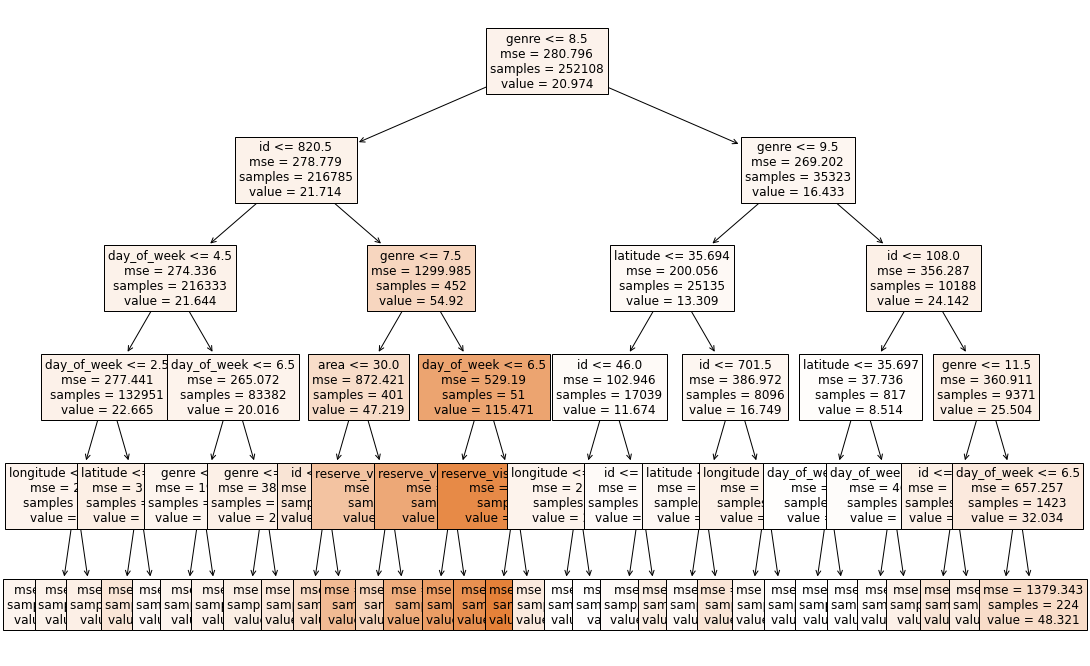

In [124]:
plt.figure(figsize = (18, 12))

plot_tree(tree1, fontsize = 12, filled = True, feature_names = X_ore.columns);

In [125]:
ohe = ce.OneHotEncoder()

X_ohe = ohe.fit_transform(X)
tree1.fit(X_ohe, y).score(X_ohe, y)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.09042036499036521

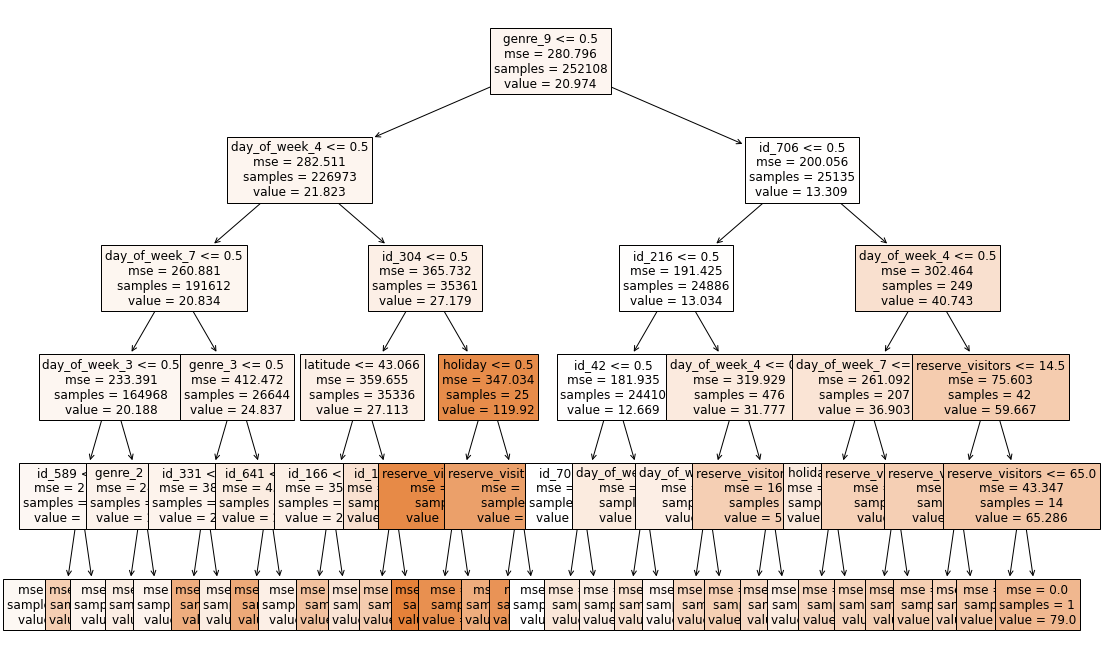

In [127]:
plt.figure(figsize = (18, 12))

plot_tree(tree1, fontsize = 12, filled = True, feature_names = X_ohe.columns);

In [129]:
te = ce.TargetEncoder()

X_te = te.fit_transform(X, y)
tree1.fit(X_te, y).score(X_te, y)

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.4534961233081768

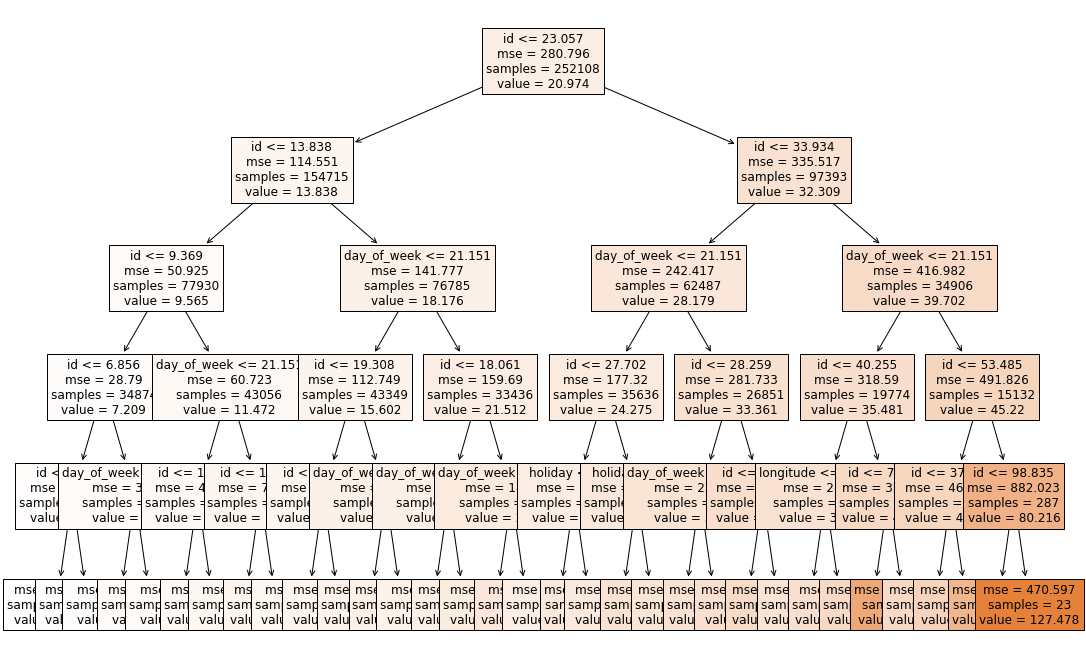

In [130]:
plt.figure(figsize = (18, 12))

plot_tree(tree1, fontsize = 12, filled = True, feature_names = X_ore.columns);

In [131]:
feats = pd.DataFrame({
    'Col': X_te.columns,
    'Imp': tree1.feature_importances_
})

feats.sort_values(by = 'Imp', ascending = False)

,Col,Imp
0,id,0.901086
1,day_of_week,0.095215
2,holiday,0.002277
6,longitude,0.001422
3,genre,0.000000
4,area,0.000000
5,latitude,0.000000
7,reserve_visitors,0.000000
